# Bias Classification using Linear Regression

References:
- https://en.wikipedia.org/wiki/Linear_regression
- https://en.wikipedia.org/wiki/Least_squares

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
stat_acc_df = pd.read_csv("../data/stationary_acc.csv")
stat_gyr_df = pd.read_csv("../data/stationary_gyr.csv")

In [17]:
def lin_reg_model_approx(y, x):
    """Return a0, a1 model approximation y = a0 + a1*x given dataset (y, x)."""
    assert len(y) == len(x)
    m = len(y)
    x_sum = 0.0
    y_sum = 0.0
    xy_sum = 0.0
    xsqr_sum = 0.0
    for i in range(m):
        x_sum += x[i]
        y_sum += y[i]
        xy_sum += x[i] * y[i]
        xsqr_sum += x[i] ** 2

    a1 = (m * xy_sum - x_sum * y_sum) / (m * xsqr_sum - x_sum**2)
    a0 = 1 / m * y_sum - a1 / m * x_sum

    return a0, a1

In [18]:
def plot_regression_with_data(y, x, fx, title="Regression Results", xlabel="x", ylabel="y/fx"):
    plt.title(title)
    plt.plot(x, y, "o")
    plt.plot(x, fx)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

## Accelerometer Linear Regression Model

In [19]:
accel_time_vec = stat_acc_df.loc[:, 'Time (s)'].to_numpy()
accel_yaxis_vec = stat_acc_df.loc[:, 'Acceleration y (m/s^2)'].to_numpy()
accel_time_vec.shape, accel_yaxis_vec.shape

((50208,), (50208,))

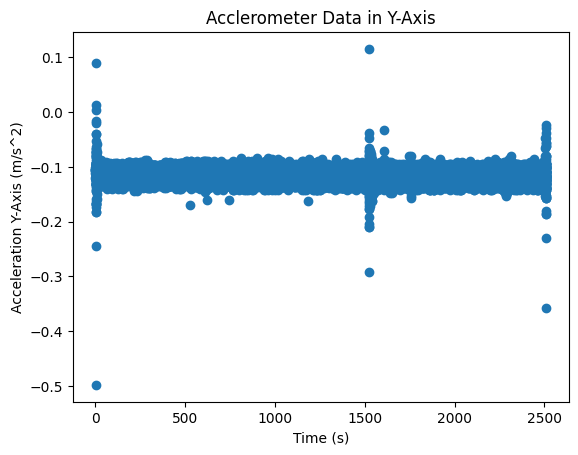

In [20]:
plt.title("Acclerometer Data in Y-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration Y-Axis (m/s^2)")
plt.plot(accel_time_vec, accel_yaxis_vec, 'o')

In [21]:
accel_b, accel_m = lin_reg_model_approx(accel_yaxis_vec, accel_time_vec)
accel_b, accel_m

(np.float64(-0.11439193955665476), np.float64(-1.7055461301349091e-06))

In [22]:
accel_fx = accel_m * accel_time_vec + accel_b

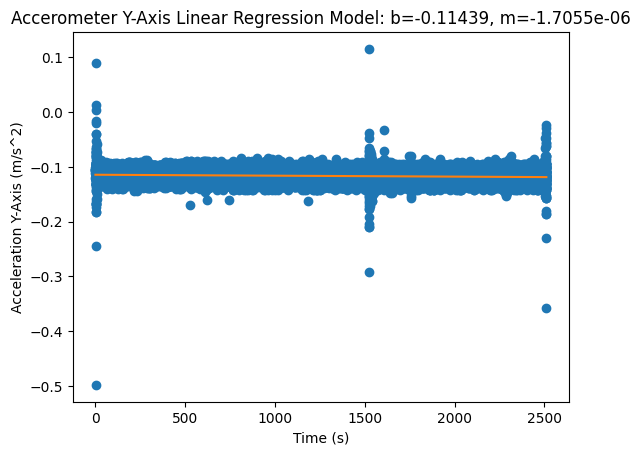

In [23]:
plot_regression_with_data(accel_yaxis_vec, accel_time_vec, accel_fx, title=f"Accerometer Y-Axis Linear Regression Model: b={round(accel_b,5 )}, m={round(accel_m, 10)}", xlabel="Time (s)", ylabel="Acceleration Y-Axis (m/s^2)")

> Intial Bias (b): -0.11439

> Time-varying Bias (m): -1.70555e-6

## Accelerometer Noise Expected Value and Variance

In [ ]:
stat_acc_df.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,0.069651,0.080758,-0.120838,9.752547
1,0.119651,0.085543,-0.101695,9.756734
2,0.169651,0.090329,-0.106481,9.747163
3,0.219651,0.066401,-0.105882,9.766306
4,0.269651,0.080758,-0.111266,9.751948


In [25]:
stat_acc_df.describe()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
count,50208.000000,50208.000000,50208.000000,50208.000000
mean,1255.244651,0.076074,-0.116533,9.757696
std,724.697275,0.007860,0.009195,0.011075
min,0.069651,-0.141775,-0.498305,9.490533
25%,627.657151,0.071186,-0.123230,9.751350
50%,1255.244651,0.075972,-0.116650,9.757333
75%,1882.832151,0.080758,-0.110668,9.766306
max,2510.419651,0.185444,0.115454,10.130613


In [26]:
stat_acc_df.loc[:, 'Acceleration y (m/s^2)'] = stat_acc_df['Acceleration y (m/s^2)'].apply(lambda x: x - accel_b)

In [28]:
stat_acc_df.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
0,0.069651,0.080758,-0.006446,9.752547
1,0.119651,0.085543,0.012697,9.756734
2,0.169651,0.090329,0.007911,9.747163
3,0.219651,0.066401,0.008510,9.766306
4,0.269651,0.080758,0.003126,9.751948


In [27]:
stat_acc_df.describe()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2)
count,50208.000000,50208.000000,50208.000000,50208.000000
mean,1255.244651,0.076074,-0.002141,9.757696
std,724.697275,0.007860,0.009195,0.011075
min,0.069651,-0.141775,-0.383913,9.490533
25%,627.657151,0.071186,-0.008838,9.751350
50%,1255.244651,0.075972,-0.002258,9.757333
75%,1882.832151,0.080758,0.003724,9.766306
max,2510.419651,0.185444,0.229846,10.130613


> Noise Mean: $$E[\nu(t)] = -0.002141$$

> Noise Var: $$E[\nu^2(t)] = R = 0.009195^2$$

## Gyro Linear Regression Model

In [33]:
gyro_time_vec = stat_gyr_df.loc[:, 'Time (s)'].to_numpy()
gyro_zaxis_vec = stat_gyr_df.loc[:, 'Gyroscope z (rad/s)'].to_numpy()
gyro_time_vec.shape, gyro_zaxis_vec.shape

((50208,), (50208,))

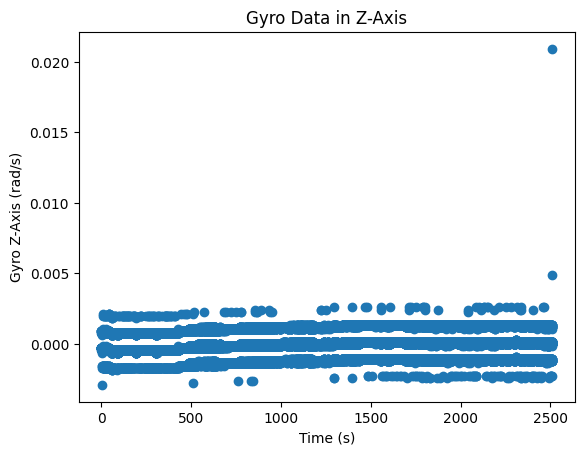

In [34]:
plt.title("Gyro Data in Z-Axis")
plt.xlabel("Time (s)")
plt.ylabel("Gyro Z-Axis (rad/s)")
plt.plot(gyro_time_vec, gyro_zaxis_vec, 'o')

In [35]:
gyro_b, gyro_m = lin_reg_model_approx(gyro_zaxis_vec, gyro_time_vec)
gyro_b, gyro_m

(np.float64(-8.658192402998033e-06), np.float64(1.3776831294804729e-08))

In [36]:
gyro_fx = gyro_m * gyro_time_vec + gyro_b

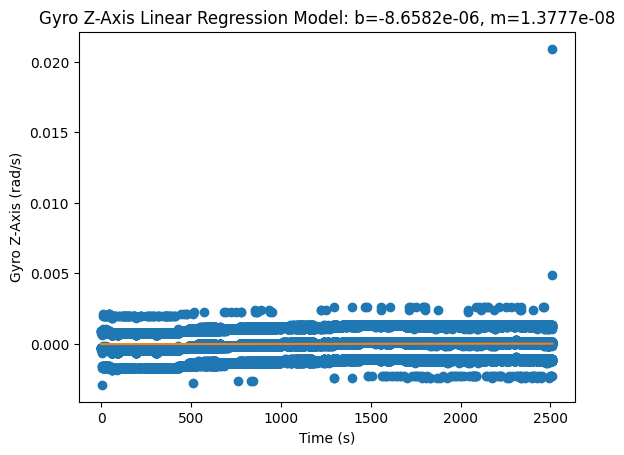

In [37]:
plot_regression_with_data(gyro_zaxis_vec, gyro_time_vec, gyro_fx, title=f"Gyro Z-Axis Linear Regression Model: b={round(gyro_b,10 )}, m={round(gyro_m, 12)}", xlabel="Time (s)", ylabel="Gyro Z-Axis (rad/s)")

> Intial Bias (b): -8.6582e-06

> Time-varying Bias (m): 1.3777e-08

## Gyro Noise Expected Value and Variance

In [30]:
stat_gyr_df.head()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
0,0.084551,0.000611,0.000764,-0.000305
1,0.134551,-0.003054,0.000764,-0.000305
2,0.184551,-0.001833,0.000764,-0.000305
3,0.234551,-0.000611,-0.000458,-0.000305
4,0.284551,0.001833,0.000764,-0.000305


In [ ]:
stat_gyr_df.describe()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
count,50208.000000,50208.000000,50208.000000,50208.000000
mean,1255.259551,-0.000013,0.000007,0.000009
std,724.697275,0.002788,0.001189,0.000714
min,0.084551,-0.357814,-0.092546,-0.002902
25%,627.672051,-0.000458,-0.000764,-0.000305
50%,1255.259551,-0.000305,0.000305,-0.000000
75%,1882.847051,0.000916,0.000458,0.000153
max,2510.434551,0.460440,0.063683,0.020922


In [38]:
stat_gyr_df.loc[:, 'Gyroscope z (rad/s)'] = stat_gyr_df['Gyroscope z (rad/s)'].apply(lambda x: x - gyro_b)

In [40]:
stat_gyr_df.head()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
0,0.084551,0.000611,0.000764,-0.000297
1,0.134551,-0.003054,0.000764,-0.000297
2,0.184551,-0.001833,0.000764,-0.000297
3,0.234551,-0.000611,-0.000458,-0.000297
4,0.284551,0.001833,0.000764,-0.000297


In [41]:
stat_gyr_df.describe()

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s)
count,50208.000000,50208.000000,50208.000000,50208.000000
mean,1255.259551,-0.000013,0.000007,0.000017
std,724.697275,0.002788,0.001189,0.000714
min,0.084551,-0.357814,-0.092546,-0.002893
25%,627.672051,-0.000458,-0.000764,-0.000297
50%,1255.259551,-0.000305,0.000305,0.000009
75%,1882.847051,0.000916,0.000458,0.000161
max,2510.434551,0.460440,0.063683,0.020931


> Noise Mean: $$E[\nu(t)] = 0.000017$$

> Noise Var: $$E[\nu^2(t)] = R = 0.000714^2$$